# Lab 12 Tasks

In this notebook we will apply basic time series analysis to stock price data for Meta and Amazon, sourced from Yahoo Finance.

In [2]:
from datetime import datetime
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline 

## Task 1

Load the stock price CSV files for both Meta and Amazon into separate Pandas Dat aFrames.

Note: Dates in these files are stored in "day/month/year" format

In [4]:
amazon_df = pd.read_csv("stock-amazon.csv", parse_dates=["date"], index_col="date",dayfirst=True)
amazon_df.head()

,open,high,low,close
date,,,,
2021-01-04,163.500000,163.600006,157.201004,159.331497
2021-01-05,158.300507,161.169006,158.253006,160.925507
2021-01-06,157.324005,159.875504,156.557999,156.919006
2021-01-07,157.850006,160.427002,157.750000,158.108002
2021-01-08,159.000000,159.531998,157.110001,159.134995


In [5]:
meta_df = pd.read_csv("stock-meta.csv", parse_dates=["date"], index_col="date",dayfirst=True)
meta_df

,open,high,low,close
date,,,,
2021-01-04,274.779999,275.000000,265.200012,268.940002
2021-01-05,268.290009,272.399994,268.209991,270.970001
2021-01-06,262.000000,267.750000,260.010010,263.309998
2021-01-07,265.899994,271.609985,264.779999,268.739990
2021-01-08,268.309998,268.950012,263.179993,267.570007
...,...,...,...,...
2022-06-23,156.270004,159.750000,154.250000,158.750000
2022-06-24,161.729996,170.250000,161.300003,170.160004
2022-06-27,171.320007,171.750000,168.009995,169.490005


## Task 2

For each of the Data Frames, extract only the **close** stock prices for the year 2021. This should give you two new Pandas Series.

In [18]:
amazon_df2= amazon_df.loc["2021-01-01":"2021-12-31"]
meta_df2= meta_df.loc["2021-01-01":"2021-12-31"]
print(amazon_df2)

                  open        high         low       close
date                                                      
2021-01-04  163.500000  163.600006  157.201004  159.331497
2021-01-05  158.300507  161.169006  158.253006  160.925507
2021-01-06  157.324005  159.875504  156.557999  156.919006
2021-01-07  157.850006  160.427002  157.750000  158.108002
2021-01-08  159.000000  159.531998  157.110001  159.134995
...                ...         ...         ...         ...
2021-12-27  171.037003  172.942993  169.215500  169.669495
2021-12-28  170.182495  172.175995  169.135498  170.660995
2021-12-29  170.839996  171.212006  168.600494  169.201004
2021-12-30  169.699997  170.888000  168.524002  168.644501
2021-12-31  168.955994  169.350006  166.558502  166.716995

[252 rows x 4 columns]


## Task 3

Create a new time series Data Frame with two columns, one for the Meta 2021 closing prices and one for the Amazon 2021 closing prices.

In [22]:
df = pd.DataFrame({
    "Meta_Close": meta_df2["close"],
    "Amazon_Close": amazon_df2["close"]
})
df

,Meta_Close,Amazon_Close
date,,
2021-01-04,268.940002,159.331497
2021-01-05,270.970001,160.925507
2021-01-06,263.309998,156.919006
2021-01-07,268.739990,158.108002
2021-01-08,267.570007,159.134995
...,...,...
2021-12-27,346.179993,169.669495
2021-12-28,346.220001,170.660995
2021-12-29,342.940002,169.201004


## Task 4

Plot the 2021 closing prices for Meta and Amazon, using a 7-day rolling mean.

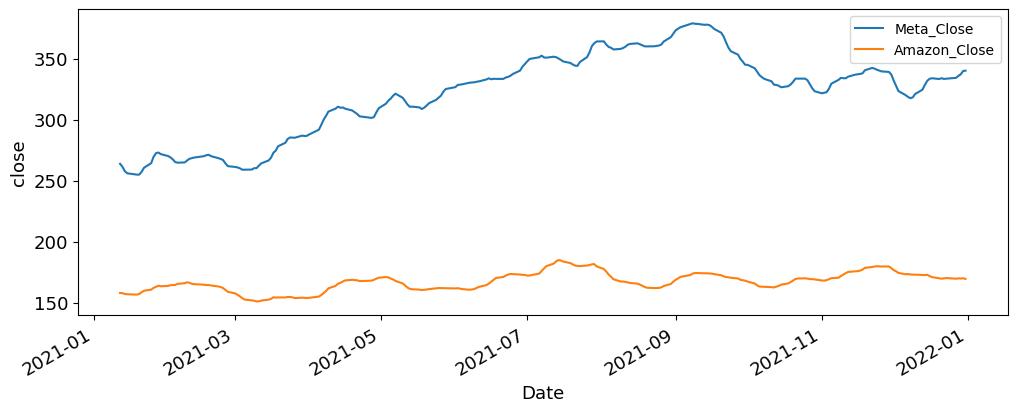

In [24]:
rm = df.rolling(7).mean()
p = rm.plot(figsize=(12, 4.5), fontsize=13)
p.set_xlabel("Date",fontsize=13)
p.set_ylabel("close",fontsize=13);

## Task 5 

Resample the new Data Frame to monthly time windows, and plot the new monthly time series.

In [30]:
df_month = df.resample("ME").mean()
df_month.head(20)

,Meta_Close,Amazon_Close
date,,
2021-01-31,264.609474,160.002421
2021-02-28,266.337894,163.193421
2021-03-31,275.506957,153.413631
2021-04-30,307.753810,167.608714
2021-05-31,317.335997,162.313000
2021-06-30,336.425909,168.386271
2021-07-31,353.377145,180.800310
2021-08-31,363.016821,165.645887
2021-09-30,363.967143,171.359143


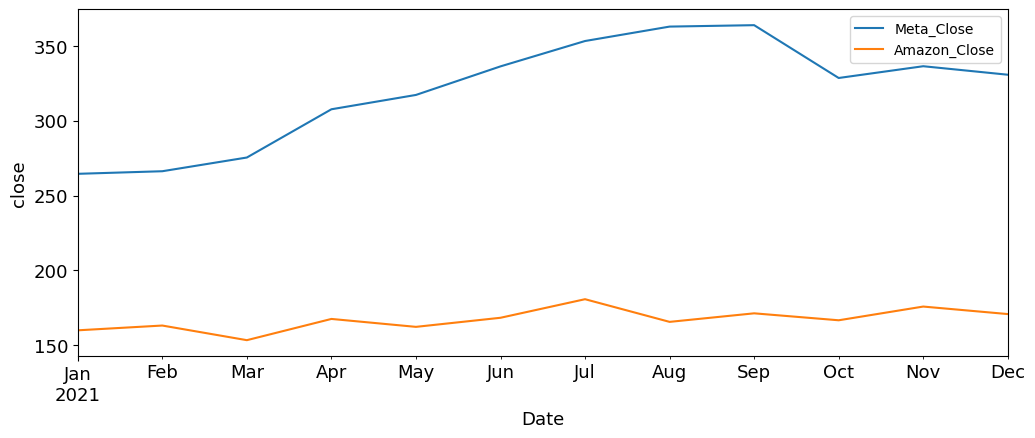

In [32]:
p = df_month.plot(figsize=(12, 4.5), fontsize=13)
p.set_xlabel("Date",fontsize=13)
p.set_ylabel("close",fontsize=13);